In [29]:
# import libraries
!pip install researchpy
import os
import numpy as np
import pandas as pd
import researchpy as rp

In [5]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 3 rows
df.head(3)

Numeric columns:  ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'rank', 'score'] 

String columns:  ['name', 'region', 'team', 'affiliate', 'gender', 'eat', 'train', 'background', 'experience', 'schedule', 'division'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  991 non-null    Int64 
 1   name        991 non-null    string
 2   region      991 non-null    string
 3   team        991 non-null    string
 4   affiliate   991 non-null    string
 5   gender      991 non-null    string
 6   age         991 non-null    Int64 
 7   height      991 non-null    Int64 
 8   weight      991 non-null    Int64 
 9   fran        991 non-null    Int64 
 10  helen       991 non-null    Int64 
 11  grace       991 non-null    Int6

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
0,2720,justin adams,south central,woodward crossfit,woodward crossfit,male,24,68,180,126,...,405,80,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,3448,464
1,6922,daniel adamson,south west,crossfit the point,crossfit the point,male,31,67,150,244,...,330,42,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i inc...,i played college sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|i do multipl...,male,35748,712
2,12563,steven lee adams,mid atlantic,crossfit kaiju,crossfit kaiju,male,37,72,210,162,...,425,49,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i inc...,i played youth or high school level sports|i p...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|i ty...,male,5073,485


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>One way Analysis of Variance (ANOVA)</strong></h1>

## ANOVA Hypotheses
+ Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp
+ Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

### Parametric test assumptions
+ Population distributions are normal
+ Samples have equal variances
+ Independence

## ANOVA Assumptions
+ Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
+ Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
+ The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).


## How ANOVA works?
+ Check sample sizes: equal number of observation in each group
+ Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
+ Calculate Mean Square error (MSE) (SS error/df of residuals)
+ Calculate F value (MS of group/MSE)
+ Calculate p value based on F value and degrees of freedom (df)

## Questions?
+ Imbalance label problem (unequal sample size for each group) data

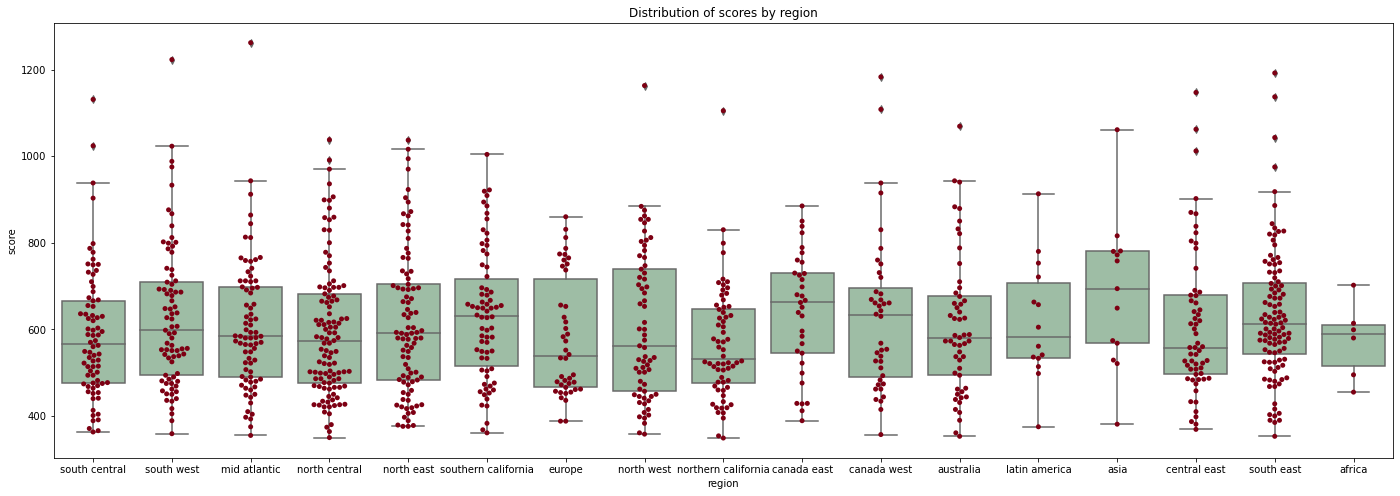

In [15]:
# generate a boxplot to see the data Distribution of scores by region. Using boxplot, we can
# easily detect the differences between different regions
import matplotlib.pyplot as plt
import seaborn as sns
# set with and height of the figure
plt.figure(figsize=(24,8))
ax = sns.boxplot(x='region', y='score', data=df, color='#99c2a2')
ax = sns.swarmplot(x="region", y="score", data=df, color='#7d0013')
# set title with matplotlib
plt.title('Distribution of scores by region')
plt.show()

In [31]:
rp.summary_cont(df['score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,score,991.0,610.5499,156.3046,4.9652,600.8065,620.2934


In [30]:
rp.summary_cont(df['score'].groupby(df['region']))

,N,Mean,SD,SE,95% Conf.,Interval
region,,,,,,
africa,6,574.1667,88.3706,36.0772,481.4274,666.9059
asia,13,683.3846,173.3679,48.0836,578.6195,788.1498
australia,53,608.0566,161.3581,22.1642,563.5808,652.5324
canada east,33,639.6061,139.1072,24.2155,590.2808,688.9313
canada west,40,630.7000,181.2259,28.6543,572.7411,688.6589
central east,59,610.2034,169.9198,22.1217,565.9220,654.4847
europe,42,580.4286,137.6875,21.2456,537.5221,623.3350
latin america,14,617.8571,139.5624,37.2996,537.2762,698.4381
mid atlantic,77,607.6753,151.0223,17.2106,573.3975,641.9532


In [34]:
print(f'NUMBER OF CATEGORIES: {df.region.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.region.unique()}\n\n\n')

NUMBER OF CATEGORIES: 17; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[      'south central',          'south west',        'mid atlantic',
       'north central',          'north east', 'southern california',
              'europe',          'north west', 'northern california',
         'canada east',         'canada west',           'australia',
       'latin america',                'asia',        'central east',
          'south east',              'africa']
Length: 17, dtype: string





In [38]:
# ONE-WAY ANOVA USING SCIPY.STATS
from scipy.stats import stats

# calculate f_oneway by looping through unique regions
stats.f_oneway(*[df['score'][df['region'] == region] for region in df.region.unique()])

F_onewayResult(statistic=1.1889922399442483, pvalue=0.26993810389596873)

In [26]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat
res = stat()
res.bartlett(df=df, res_var='score', xfac_var='region')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),14.5262
1,Degrees of freedom (Df),16.0000
2,p value,0.5596


In [28]:
# Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat
res = stat()
res.levene(df=df, res_var='score', xfac_var='region')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.8325
1,Degrees of freedom (Df),16.0000
2,p value,0.6489


### -------> OBSERVATION
As the p value (0.56) is significant, we reject the null hypothesis and conclude that regions have unequal variances.

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Kruskal Wallis test</strong></h1>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Chi Square Goodness of Fit test</strong></h1>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Tests for Independence</strong></h1>

In [35]:
# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

[NbConvertApp] Converting notebook EDA.ipynb to python
[NbConvertApp] Writing 16116 bytes to EDA.py
[NbConvertApp] Converting notebook preprocessing.ipynb to python
[NbConvertApp] Writing 9911 bytes to preprocessing.py
[NbConvertApp] Converting notebook quiz_3.ipynb to python
[NbConvertApp] Writing 5746 bytes to quiz_3.py
[NbConvertApp] Converting notebook normality_test.ipynb to python
[NbConvertApp] Writing 9797 bytes to normality_test.py
[NbConvertApp] Converting notebook quiz_2.ipynb to python
[NbConvertApp] ERROR | Notebook JSON is invalid: data.cells[{data__cells_x}] must be valid exactly by one definition (0 matches found)

Failed validating <unset> in notebook['data']['cells']:

On instance:
<unset>
[NbConvertApp] Writing 9290 bytes to quiz_2.py
[NbConvertApp] Converting notebook statistical_methods.ipynb to python
[NbConvertApp] Writing 3015 bytes to statistical_methods.py
[NbConvertApp] Converting notebook demo_normality_test.ipynb to python
[NbConvertApp] Writing 3950 bytes 


# References
Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
Virtanen P, Gommers R, Oliphant TE, Haberland M, Reddy T, Cournapeau D, Burovski E, Peterson P, Weckesser W, Bright J, van der Walt SJ. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature methods. 2020 Mar;17(3):261-72.
Mangiafico, S.S. 2015. An R Companion for the Handbook of Biological Statistics, version 1.3.2.
Knief U, Forstmeier W. Violating the normality assumption may be the lesser of two evils. bioRxiv. 2018 Jan 1:498931.
Kozak M, Piepho HP. What’s normal anyway? Residual plots are more telling than significance tests when checking ANOVA assumptions. Journal of Agronomy and Crop Science. 2018 Feb;204(1):86-98.